In [1]:
!pip install yfinance statsmodels matplotlib numpy pandas

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ticker = 'TSLA'
start_date = '2015-01-01'
end_date = '2024-10-31'


In [4]:
data = yf.download(ticker, start=start_date, end=end_date)
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000
2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500
...,...,...,...,...,...,...
2024-10-24,244.679993,262.119995,242.649994,260.480011,260.480011,204491900
2024-10-25,256.010010,269.489990,255.320007,269.190002,269.190002,161611900
2024-10-28,270.000000,273.540009,262.239990,262.510010,262.510010,107653600


In [5]:
data = data[['Close']] 
data

,Close
Date,
2015-01-02,14.620667
2015-01-05,14.006000
2015-01-06,14.085333
2015-01-07,14.063333
2015-01-08,14.041333
...,...
2024-10-24,260.480011
2024-10-25,269.190002
2024-10-28,262.510010


In [6]:
data.rename(columns={"Close": "Price"}, inplace=True)

C:\Users\Aditya Kudva\AppData\Local\Temp\ipykernel_27752\3156097744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={"Close": "Price"}, inplace=True)


In [7]:
print(data.head())

                Price
Date                 
2015-01-02  14.620667
2015-01-05  14.006000
2015-01-06  14.085333
2015-01-07  14.063333
2015-01-08  14.041333


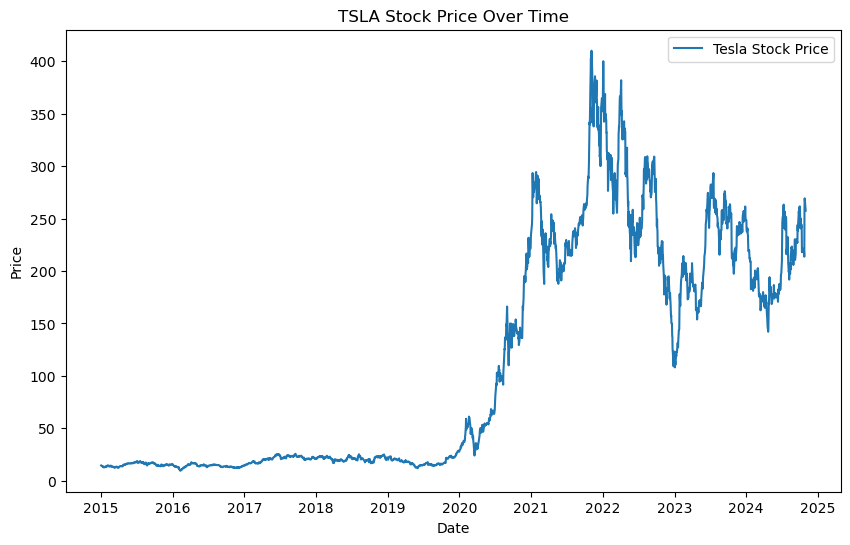

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(data['Price'], label='Tesla Stock Price')
plt.title(f'{ticker} Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
result = adfuller(data['Price'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] < 0.05:
    print("The data is stationary.")
else:
    print("The data is not stationary.")

ADF Statistic: -1.1507672706146046
p-value: 0.6944080657685302
The data is not stationary.


In [11]:
data_diff = data['Price'].diff().dropna()
data_diff

Date
2015-01-05    -0.614668
2015-01-06     0.079333
2015-01-07    -0.022000
2015-01-08    -0.021999
2015-01-09    -0.264000
                ...    
2024-10-24    46.830017
2024-10-25     8.709991
2024-10-28    -6.679993
2024-10-29    -2.990021
2024-10-30    -1.970001
Name: Price, Length: 2473, dtype: float64

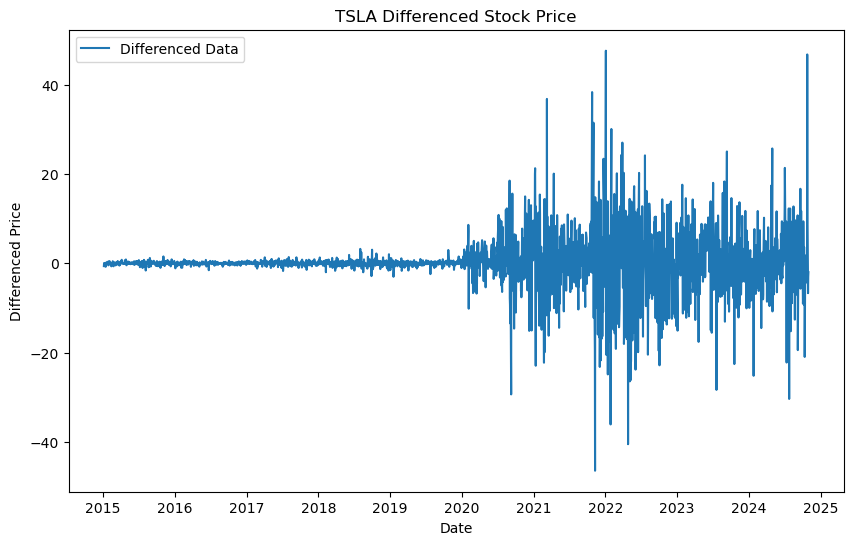

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(data_diff, label='Differenced Data')
plt.title(f'{ticker} Differenced Stock Price')
plt.xlabel('Date')
plt.ylabel('Differenced Price')
plt.legend()
plt.show()


In [13]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

In [14]:
train_size = int(len(data) * 0.8)
train_size

1979

In [16]:
train, test = data['Price'][:train_size], data['Price'][train_size:]
train, test

(Date
 2015-01-02     14.620667
 2015-01-05     14.006000
 2015-01-06     14.085333
 2015-01-07     14.063333
 2015-01-08     14.041333
                  ...    
 2022-11-03    215.309998
 2022-11-04    207.470001
 2022-11-07    197.080002
 2022-11-08    191.300003
 2022-11-09    177.589996
 Name: Price, Length: 1979, dtype: float64,
 Date
 2022-11-10    190.720001
 2022-11-11    195.970001
 2022-11-14    190.949997
 2022-11-15    194.419998
 2022-11-16    186.919998
                  ...    
 2024-10-24    260.480011
 2024-10-25    269.190002
 2024-10-28    262.510010
 2024-10-29    259.519989
 2024-10-30    257.549988
 Name: Price, Length: 495, dtype: float64)

In [17]:
model = ARIMA(train, order=(5, 1, 0))  # Adjust p, d, q values as needed
fitted_model = model.fit()

C:\Users\Aditya Kudva\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Aditya Kudva\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Aditya Kudva\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [18]:
forecast = fitted_model.forecast(steps=len(test))
forecast

C:\Users\Aditya Kudva\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Aditya Kudva\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


1979    177.678130
1980    177.159613
1981    177.093947
1982    176.654713
1983    176.892897
           ...    
2469    176.860923
2470    176.860923
2471    176.860923
2472    176.860923
2473    176.860923
Name: predicted_mean, Length: 495, dtype: float64

In [19]:
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"RMSE: {rmse}")

RMSE: 49.566200226507945


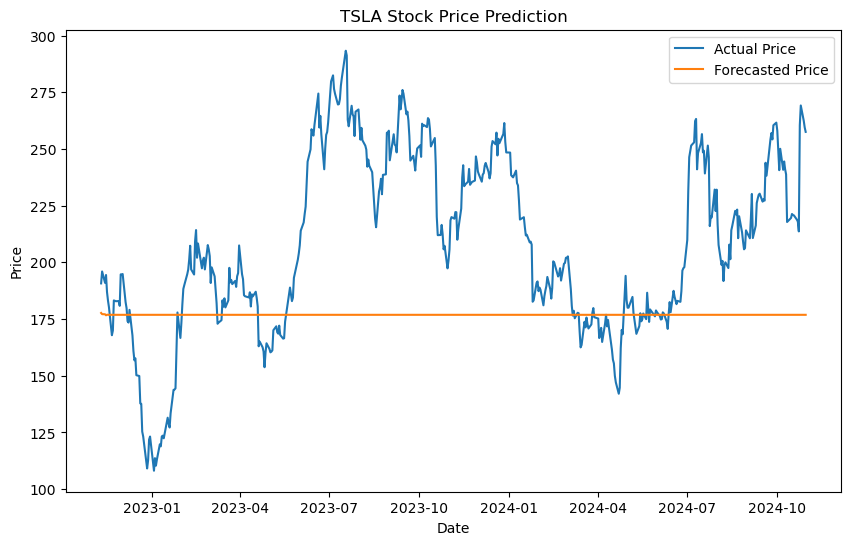

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual Price')
plt.plot(test.index, forecast, label='Forecasted Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [21]:
forecast_result = fitted_model.get_forecast(steps=len(test))
forecast_result

C:\Users\Aditya Kudva\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Aditya Kudva\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [22]:
forecast_ci = forecast_result.conf_int()
forecast_ci

,lower Price,upper Price
1979,166.971856,188.384404
1980,162.300395,192.018830
1981,158.900429,195.287464
1982,155.644205,197.665222
1983,153.213235,200.572559
...,...,...
2469,-61.232643,414.954489
2470,-61.475052,415.196898
2471,-61.717213,415.439059
2472,-61.959130,415.680976


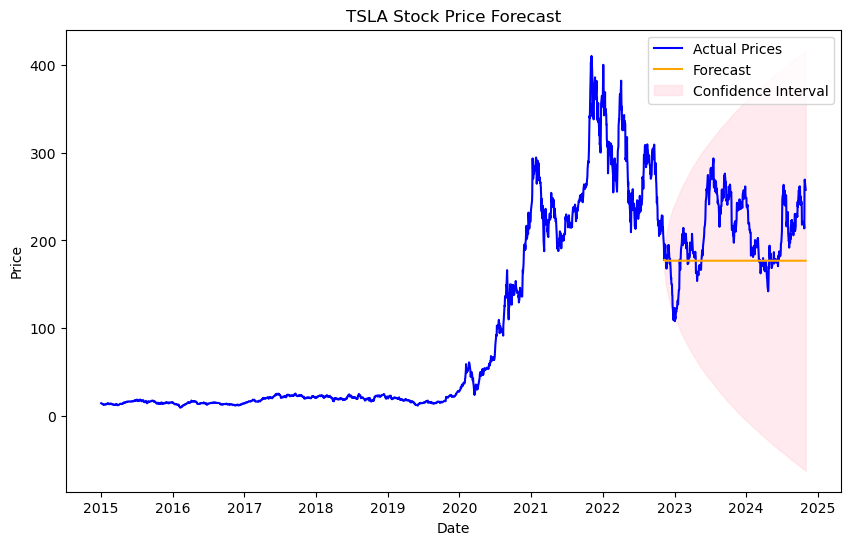

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(data['Price'], label='Actual Prices', color='blue')
plt.plot(test.index, forecast, label='Forecast', color='orange')
plt.fill_between(test.index, 
                 forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], 
                 color='pink', alpha=0.3, label='Confidence Interval')
plt.title(f'{ticker} Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [24]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

In [25]:
def optimize_arima(data, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    model = ARIMA(data, order=(p, d, q))
                    model_fit = model.fit()
                    aic = model_fit.aic
                    if aic < best_score:
                        best_score, best_cfg = aic, (p, d, q)
                except:
                    continue
    return best_cfg


In [26]:
p_values = range(0, 5)
d_values = range(0, 2)
q_values = range(0, 5)

In [27]:
best_order = optimize_arima(train, p_values, d_values, q_values)
print(f"Optimal ARIMA order: {best_order}")

C:\Users\Aditya Kudva\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Aditya Kudva\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Aditya Kudva\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Aditya Kudva\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forec

Optimal ARIMA order: (2, 1, 3)


C:\Users\Aditya Kudva\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [29]:
seasonal_order = (1, 1, 1, 12)  # Adjust seasonal parameters (P, D, Q, m)
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit()


C:\Users\Aditya Kudva\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Aditya Kudva\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [30]:
sarima_forecast = sarima_fit.forecast(steps=len(test))
sarima_forecast

C:\Users\Aditya Kudva\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Aditya Kudva\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


1979    178.533043
1980    178.123748
1981    177.948393
1982    178.007933
1983    178.474470
           ...    
2469    216.784545
2470    216.428727
2471    217.114088
2472    216.546765
2473    216.416997
Name: predicted_mean, Length: 495, dtype: float64

In [31]:
rmse = np.sqrt(mean_squared_error(test, sarima_forecast))
print(f"SARIMA RMSE: {rmse}")


SARIMA RMSE: 38.88456295758597


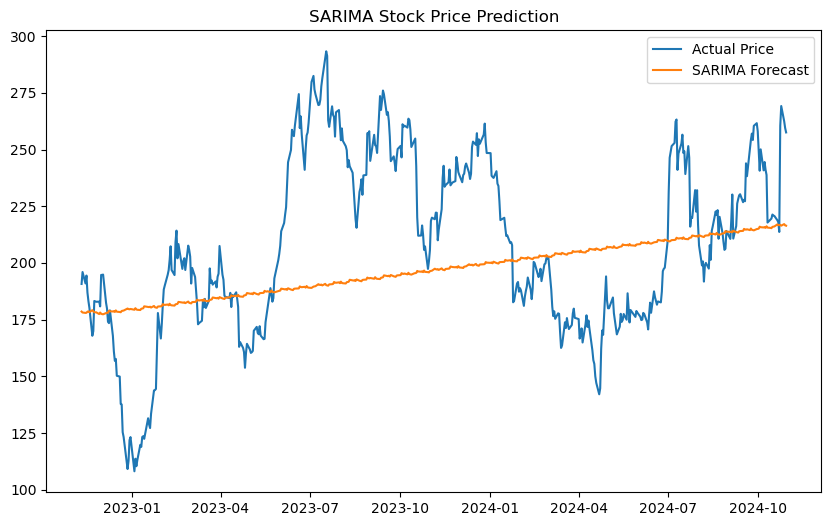

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual Price')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast')
plt.legend()
plt.title('SARIMA Stock Price Prediction')
plt.show()

In [33]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np


In [34]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


In [35]:
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(x), np.array(y)

In [36]:
seq_length = 60  # Sequence length
X, y = create_sequences(scaled_data, seq_length)


In [37]:
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [39]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

C:\Users\Aditya Kudva\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0312
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0028
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0020
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0020
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0016
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0016
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0016
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0014
Epoch 9/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0016
Epoch 10/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0013
Epoch 11/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0011
Epoch 12/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0015
Epoch 13/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0012
Epoch 14/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0012
Epoch 15/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0011
Epoc

In [42]:
# Make predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


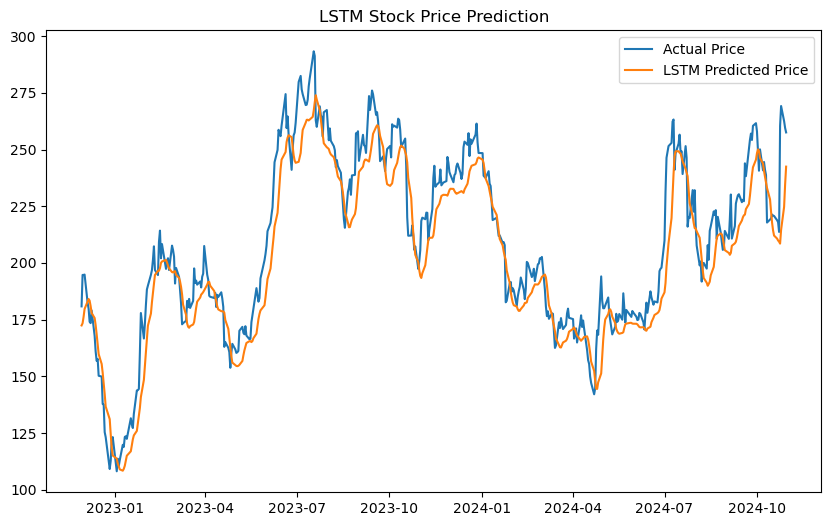

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(data.index[-len(y_test):], scaler.inverse_transform(y_test), label='Actual Price')
plt.plot(data.index[-len(y_test):], predicted_prices, label='LSTM Predicted Price')
plt.legend()
plt.title('LSTM Stock Price Prediction')
plt.show()